In [2]:
import numpy as np
import pandas as pd

In [3]:
! wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2020-06-20 14:57:03--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  1.49MB/s    in 0.6s    

2020-06-20 14:57:04 (1.49 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [ ]:
! ls content

ls: cannot access 'content': No such file or directory


In [4]:
! unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [5]:
! ls ./ml-latest-small/

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In [6]:
! mkdir movielens

In [7]:
! mv ./ml-latest-small/* movielens

In [ ]:
! ls movielens

In [ ]:
! head -5 ./movielens/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [8]:
! cat ./movielens/movies.csv | wc -l

9743


In [10]:
movies = pd.read_csv('/content/movielens/movies.csv', sep=',')
tags = pd.read_csv('/content/movielens/tags.csv', sep=',')
ratings = pd.read_csv('/content/movielens/ratings.csv', sep=',', parse_dates=['timestamp'])

In [11]:
del tags['timestamp']
del ratings['timestamp']

### Filtering for selecting rows

In [ ]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
is_highly_rated = ratings['rating'] >= 4.0
ratings[is_highly_rated][30:50]

,userId,movieId,rating
36,1,608,5.0
38,1,661,5.0
40,1,733,4.0
43,1,804,4.0
44,1,919,5.0
45,1,923,5.0
46,1,940,5.0
47,1,943,4.0
48,1,954,5.0
50,1,1023,5.0


In [ ]:
is_animation = movies['genres'].str.contains('Animation')
movies[is_animation][5:15]

,movieId,title,genres
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
512,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
513,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
522,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi
527,616,"Aristocats, The (1970)",Animation|Children
534,631,All Dogs Go to Heaven 2 (1996),Adventure|Animation|Children|Fantasy|Musical|R...


In [ ]:
len(movies[is_animation])

611

In [ ]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
272,313,"Swan Princess, The (1994)",Animation|Children
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical


### Group-by and Aggregate

In [ ]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [ ]:
ratings_count = ratings[['movieId', 'rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [ ]:
average_rating = ratings[['movieId', 'rating']].groupby('movieId').mean()
average_rating

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [ ]:
movie_count = ratings[['movieId', 'rating']].groupby('movieId').count()
movie_count

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


## Merge DataFrames

In [ ]:
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game


### Combine Aggregation, Merging and Filters to get useful analytics

In [ ]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
box_office = movies.merge(avg_ratings, how='inner', on='movieId')
box_office.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [ ]:
box_office[box_office['rating'] >= 4.0]

,movieId,title,genres,rating
27,28,Persuasion (1995),Drama|Romance,4.227273
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,4.013158
36,40,"Cry, the Beloved Country (1995)",Drama,4.250000
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.237745
48,53,Lamerica (1994),Adventure|Drama,5.000000
...,...,...,...,...
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.500000
9716,193571,Silver Spoon (2014),Comedy|Drama,4.000000
9717,193573,Love Live! The School Idol Movie (2015),Animation,4.000000
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000


In [ ]:
is_comedy = box_office['genres'].str.contains('Comedy')
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_comedy & is_highly_rated]

,movieId,title,genres,rating
52,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,4.027027
94,106,Nobody Loves Me (Keiner liebt mich) (1994),Comedy|Drama,4.000000
148,176,Living in Oblivion (1995),Comedy,4.307692
158,187,Party Girl (1995),Comedy,4.125000
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068
...,...,...,...,...
9708,190209,Jeff Ross Roasts the Border (2017),Comedy,4.000000
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.500000
9716,193571,Silver Spoon (2014),Comedy|Drama,4.000000
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000


## Vectorized String Operations

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Split `genres` into multiple columns

In [ ]:
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


Add a new column for comedy genre flag

In [ ]:
movie_genres['is_comedy'] = movies['genres'].str.contains('Comedy')
movie_genres.head()

,0,1,2,3,4,5,6,7,8,9,is_comedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True


Extract year from title e.g. (1995)

In [21]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


## Parsing Timestamps

Timestamps are common in sensor data or other time series datasets. Let us revisit the *tags.csv* dataset and read the timestamps!

In [12]:
tags = pd.read_csv('/content/movielens/tags.csv', sep=',')
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

#### UNIX time / POSIX time / epoch time records time in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [13]:
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


#### Data type datetime64[ns] maps to either M8[ns] depending on the hardware

In [15]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [16]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56


### Selecting rows based on timestamps

In [17]:
greater_than_t = tags['parsed_time'] > '2015-02-01'
selected_rows = tags[greater_than_t]
tags.shape, selected_rows.shape

((3683, 5), (1710, 5))

#### Sorting the table using the timestamps

In [18]:
tags.sort_values(by='parsed_time', ascending=True)[-10:]

,userId,movieId,tag,timestamp,parsed_time
513,184,4896,harry potter,1537094544,2018-09-16 10:42:24
514,184,4896,humorous,1537094550,2018-09-16 10:42:30
512,184,4896,alan rickman,1537094576,2018-09-16 10:42:56
516,184,5388,atmospheric,1537094680,2018-09-16 10:44:40
518,184,5388,thought-provoking,1537094685,2018-09-16 10:44:45
517,184,5388,insomnia,1537094688,2018-09-16 10:44:48
527,184,193565,anime,1537098582,2018-09-16 11:49:42
528,184,193565,comedy,1537098587,2018-09-16 11:49:47
530,184,193565,remaster,1537098592,2018-09-16 11:49:52
529,184,193565,gintama,1537098603,2018-09-16 11:50:03


## Average Movie Ratings over Time

### Are movie ratings related to year of launch?

In [22]:
average_rating = ratings[['movieId', 'rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
9719,193581,4.0
9720,193583,3.5
9721,193585,3.5
9722,193587,3.5
9723,193609,4.0


In [23]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,3.071429


In [25]:
average_rating_by_year = joined[['year', 'rating']].groupby('year', as_index=False).mean()
average_rating_by_year.head(10)

,year,rating
0,1902,3.500000
1,1903,2.500000
2,1908,4.000000
3,1915,2.000000
4,1916,3.562500
5,1917,4.500000
6,1919,2.000000
7,1920,3.678571
8,1921,4.100000
9,1922,3.531250


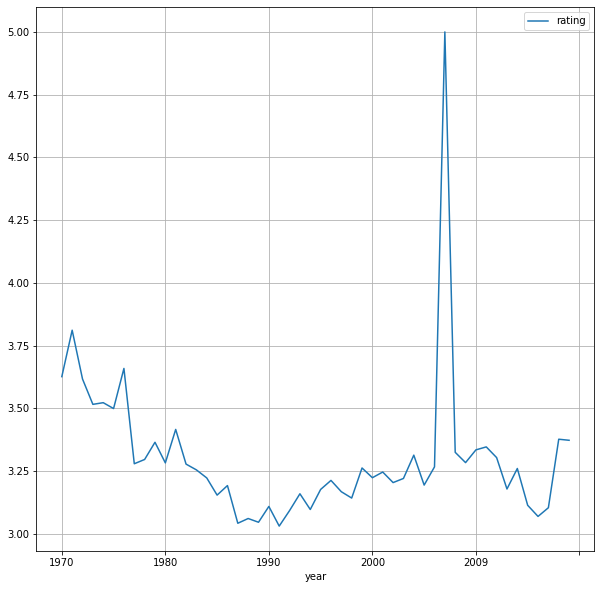

In [27]:
%matplotlib inline
average_rating_by_year[-50:].plot(x='year', y='rating', figsize=(10,10), grid=True)

#### Do some years look better for the box-office movies than others?

#### Does any datapoint seem like an outlier in some sense?

In [28]:
average_rating_by_year.rating.argmin()

3

In [29]:
average_rating_by_year.iloc[3,:]

year      1915
rating       2
Name: 3, dtype: object

In [30]:
movies[movies.year=='1915']

,movieId,title,genres,year
4743,7065,"Birth of a Nation, The (1915)",Drama|War,1915
